<a href="https://colab.research.google.com/github/Kalashri21/Kalashri-Borhade/blob/main/Inventory_Analysis_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"durgeshshinde","key":"8e4df4f719a0cd8e87811a9eb2fc5353"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! echo '{"username":"digvijayedake","key":"5a621bc12770b296bb0defb15d28d1ca"}' > /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bhanupratapbiswas/inventory-analysis-case-study

 53% 33.0M/61.9M [00:00<00:00, 62.0MB/s]
100% 61.9M/61.9M [00:00<00:00, 106MB/s] 


In [ ]:
purches = pd.read_csv('/content/InvoicePurchases12312016.csv')
PurchasePrice = pd.read_csv('/content/2017PurchasePricesDec.csv')
inv_begin_df = pd.read_csv('/content/BegInvFINAL12312016.csv')
inv_end_df = pd.read_csv('/content/EndInvFINAL12312016.csv')
sales = pd.read_csv('/content/SalesFINAL12312016.csv')
purchase_Final_df=pd.read_csv('/content/PurchasesFINAL12312016.csv')

In [ ]:
purches.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None


In [ ]:
PurchasePrice.head

<bound method NDFrame.head of        Brand                   Description  Price    Size Volume  \
0         58   Gekkeikan Black & Gold Sake  12.99   750mL    750   
1         62      Herradura Silver Tequila  36.99   750mL    750   
2         63    Herradura Reposado Tequila  38.99   750mL    750   
3         72          No. 3 London Dry Gin  34.99   750mL    750   
4         75     Three Olives Tomato Vodka  14.99   750mL    750   
...      ...                           ...    ...     ...    ...   
12256  44917     Ferreira 10-Yr Tawny Port  24.99   750mL    750   
12257  44944     Sanford Santa Rita Pnt Nr  22.99   750mL    750   
12258  45016  Neal One Lane Bridg Cab Svgn  93.99   750mL    750   
12259  46011       Folonari Pnt Nr Venezie  12.99  1500ml   1500   
12260  46964     Calera Viognier Mt Harlan  35.99   750mL    750   

       Classification  PurchasePrice  VendorNumber  \
0                   1           9.28          8320   
1                   1          28.67         

In [ ]:
inv_begin_df.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [ ]:
inv_end_df.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [ ]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
purchase_Final_df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [ ]:
purches.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

In [ ]:
purches.shape

(5543, 10)

In [ ]:
purches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [ ]:
purches['InvoiceDate'] = pd.to_datetime(purches['InvoiceDate'])

In [ ]:
purches['Total Amount'] = purches['Dollars'] + purches['Freight']

In [ ]:
purches.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval,Total Amount
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None,217.73
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None,149.12


In [ ]:
purches['Approval'].unique()

array(['None', 'Frank Delahunt'], dtype=object)

In [ ]:
drop = ['VendorNumber','PONumber','PODate']
purches.drop(drop, axis = 1, inplace =True)

In [ ]:
High_purchases_item =purches.loc[purches['Quantity'].idxmax(), 'VendorName']
Quty = purches['Quantity'].max()
print("High Prchuse Vendor Name:- ",High_purchases_item,"Quantity :-", Quty)

High Prchuse Vendor Name:-  DIAGEO NORTH AMERICA INC    Quantity :- 141660


In [ ]:
total_num_of_invoice = purches[purches['VendorName'] == 'DIAGEO NORTH AMERICA INC   '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice)
Spend_Total_Amount =purches.loc[purches['VendorName'] == 'DIAGEO NORTH AMERICA INC   ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount)

Total Number Of Invoice:- 55
Spend Total Amount:- 51216828.92


In [ ]:
Low_purchases_item =purches.loc[purches['Quantity'].idxmin(), 'VendorName']
Quty2 = purches['Quantity'].min()
print("Low Prchuse Vendor Name:- ",Low_purchases_item,"Quantity :-", Quty2)

Low Prchuse Vendor Name:-  HOOD RIVER DISTILLERS, Inc. Quantity :- 1


In [ ]:
Spend_Total_Amount =purches.loc[purches['VendorName'] == 'HOOD RIVER DISTILLERS, Inc.','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount)

Spend Total Amount:- 24153.480000000003


Sales FINAL

In [ ]:
sales.head(5)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [ ]:
drop1 = ['InventoryId','VendorNo','Brand',]
sales.drop(drop1,axis=1,inplace=True)

In [ ]:
sales

,Store,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorName
0,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
1,1,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,JIM BEAM BRANDS COMPANY
2,1,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
3,1,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,JIM BEAM BRANDS COMPANY
4,1,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,JIM BEAM BRANDS COMPANY
...,...,...,...,...,...,...,...,...,...,...,...
1048570,19,F Coppola Diamond Pnt Nr,750mL,4,51.80,12.95,2/12/2016,750,2,0.45,SOUTHERN WINE & SPIRITS NE
1048571,19,F Coppola Diamond Pnt Nr,750mL,8,103.60,12.95,2/13/2016,750,2,0.90,SOUTHERN WINE & SPIRITS NE
1048572,19,F Coppola Diamond Pnt Nr,750mL,1,12.95,12.95,2/19/2016,750,2,0.11,SOUTHERN WINE & SPIRITS NE
1048573,19,F Coppola Diamond Pnt Nr,750mL,3,38.85,12.95,2/22/2016,750,2,0.34,SOUTHERN WINE & SPIRITS NE


In [ ]:
sales['Total Amount'] = sales['SalesDollars'] + sales['ExciseTax']

In [ ]:
High_sales_item =sales.loc[sales['SalesQuantity'].idxmax(), 'VendorName']
Quty3 = sales['SalesQuantity'].max()
print("High sales Vendor Name:- ",High_sales_item,"Quantity :-", Quty3)

High sales Vendor Name:-  E & J GALLO WINERY          Quantity :- 432


In [ ]:
total_num_of_invoice3 = sales[sales['VendorName'] == 'E & J GALLO WINERY         '].shape[0]
print('Total Number Of Invoice:-',total_num_of_invoice3)
Spend_Total_Amount3 =sales.loc[sales['VendorName'] == 'E & J GALLO WINERY         ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount3)

Total Number Of Invoice:- 65240
Spend Total Amount:- 1575923.91


In [ ]:
Low_sales_item =sales.loc[sales['SalesQuantity'].idxmin(), 'VendorName']
Quty4 = sales['SalesQuantity'].min()
print("Low sales Vendor Name:- ",Low_sales_item,"Quantity :-", Quty4)

Low sales Vendor Name:-  JIM BEAM BRANDS COMPANY     Quantity :- 1


In [ ]:
Spend_Total_Amount4 =sales.loc[sales['VendorName'] == 'JIM BEAM BRANDS COMPANY    ','Total Amount'].sum()
print("Spend Total Amount:-",Spend_Total_Amount4)

Spend Total Amount:- 2703876.6599999997


In [ ]:
sales['Description'].unique()

array(['Jim Beam w/2 Rocks Glasses', "Maker's Mark Combo Pack",
       'F Coppola Dmd Ivry Cab Svgn', ..., 'Anarkos Puglia',
       'Bols Creme De Noyaux', 'Austin Hope 10 Syrah'], dtype=object)

<Axes: xlabel='Total Amount', ylabel='Description'>

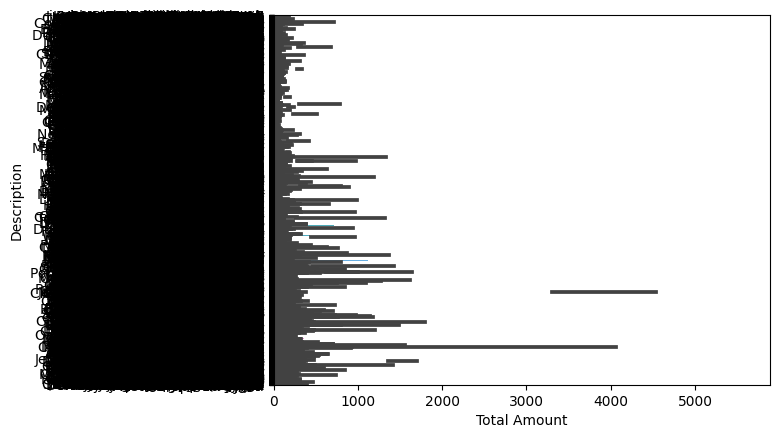

In [ ]:
sns.barplot(x='Total Amount', y='Description', data=sales)

Univariate analysis

In [ ]:
PurchasePrice.VendorName.value_counts()[0:5]

MARTIGNETTI COMPANIES          1631
ULTRA BEVERAGE COMPANY LLP      965
M S WALKER INC                  960
PERFECTA WINES                  897
E & J GALLO WINERY              527
Name: VendorName, dtype: int64

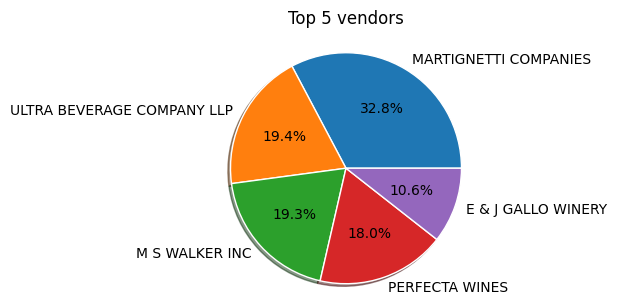

In [ ]:
plt.figure(figsize=(3,3))

mylabels=["MARTIGNETTI COMPANIES","ULTRA BEVERAGE COMPANY LLP" ,'M S WALKER INC','PERFECTA WINES','E & J GALLO WINERY']


plt.pie(PurchasePrice.VendorName.value_counts()[0:5],labels=mylabels ,autopct='%0.1f%%',radius=1.25,
        wedgeprops={'edgecolor':'white'}
        ,textprops={'size':10,},shadow=True)

plt.title('Top 5 vendors\n')
plt.show()

Bivariate Analysis

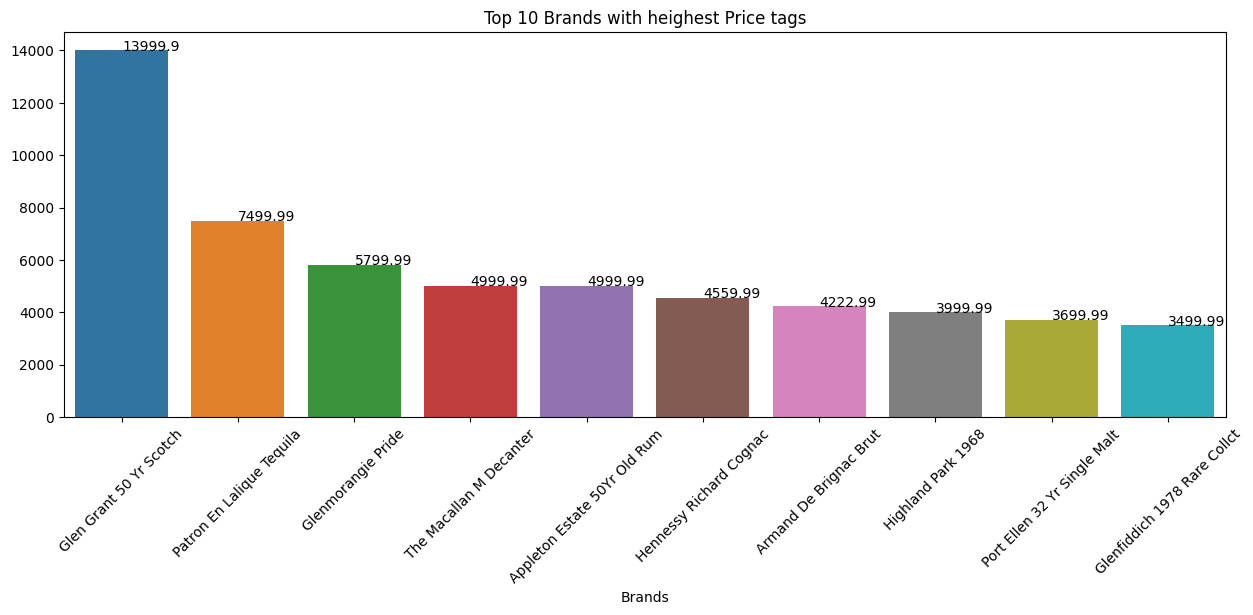

In [ ]:
plt.figure(figsize=(15,5))
vc = PurchasePrice.groupby(['Description'])['Price'].max().sort_values(ascending=False)[:10]

g = sns.barplot(x= vc.index , y = vc.values , data = PurchasePrice)

for i in range(10):
    value = vc[i]
    g.text(y = value -2, x= i+0.25, s= value, color='black', ha = 'center', fontsize= 10)

plt.title ('Top 10 Brands with heighest Price tags')
plt.xlabel('Brands')
plt.xticks(rotation= 45)
plt.show()

# As we can see "Glan grant scotch" tops the list followed by "PEL Tequilla".

In [ ]:
purches['Total Amount'] = purches['Dollars']+ purches['Freight']

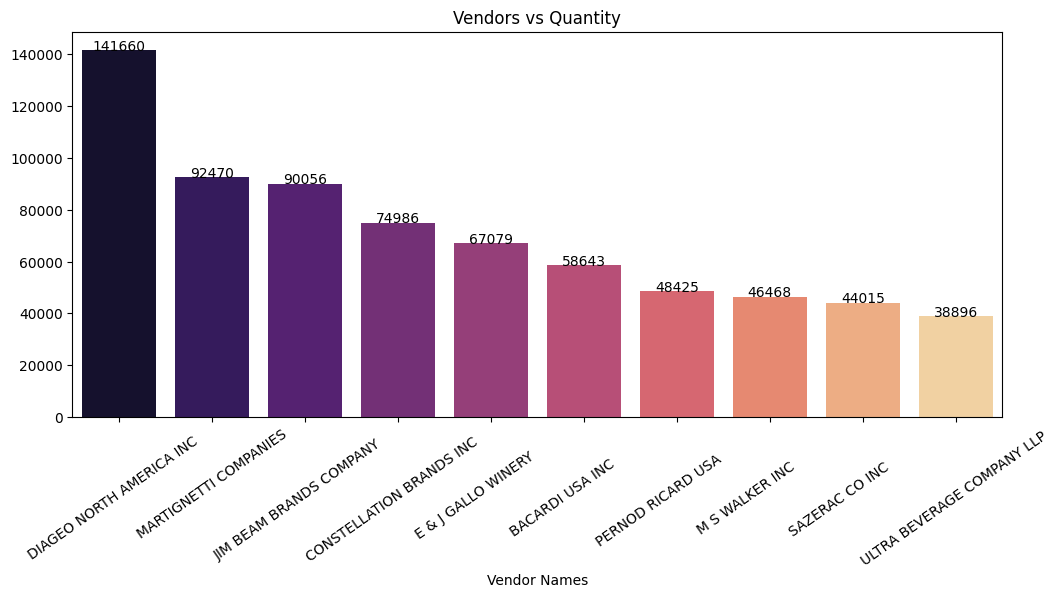

In [ ]:
plt.figure(figsize=(12,5))

vc = purches.groupby(['VendorName'])['Quantity'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index, y= vc.values, data = purches, palette='magma')

for i in range(10):
    value = vc[i]
    g.text(y= value-2 , x= i, s= value, color='black', ha = 'center', fontsize =10)

plt.title('Vendors vs Quantity')
plt.xlabel('Vendor Names')
plt.xticks(rotation= 35)
plt.show()

# Here, "Diago North America inc" purchased maximum quantities followed by "Martigentti companies".

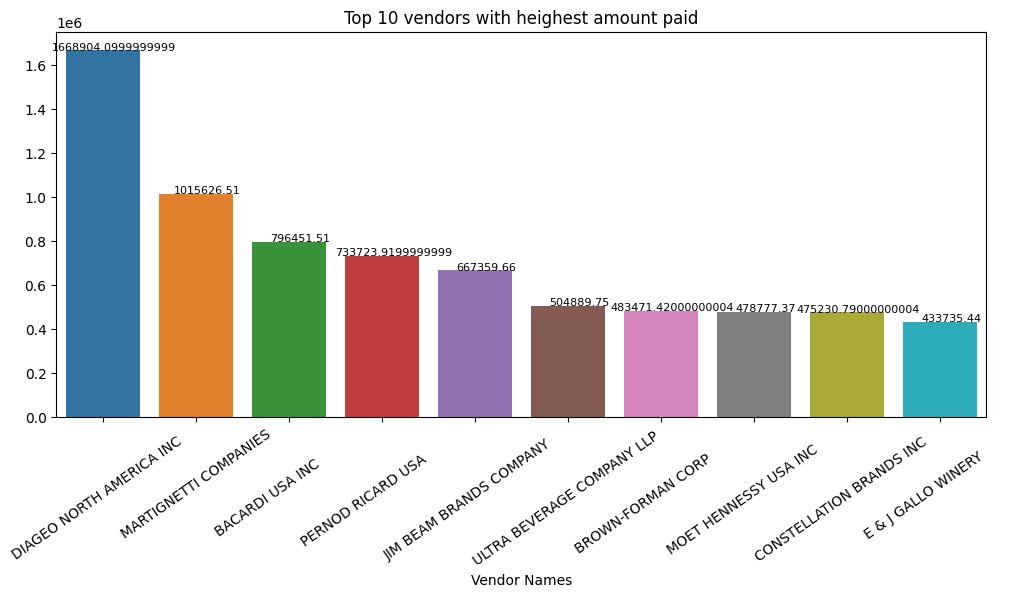

In [ ]:
plt.figure(figsize=(12,5))
vc = purches.groupby(['VendorName'])['Total Amount'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x= vc.index , y= vc.values , data = purches)

for i in range(10):
    value = vc[i]
    g.text(y= value -2 , x= i+0.125, s= value, color = 'black', ha='center',fontsize=8)

plt.title('Top 10 vendors with heighest amount paid')
plt.xlabel('Vendor Names')
plt.xticks(rotation = 35)
plt.show()

# "Diageo North America" tops the list followed by "Martignetti Companies"

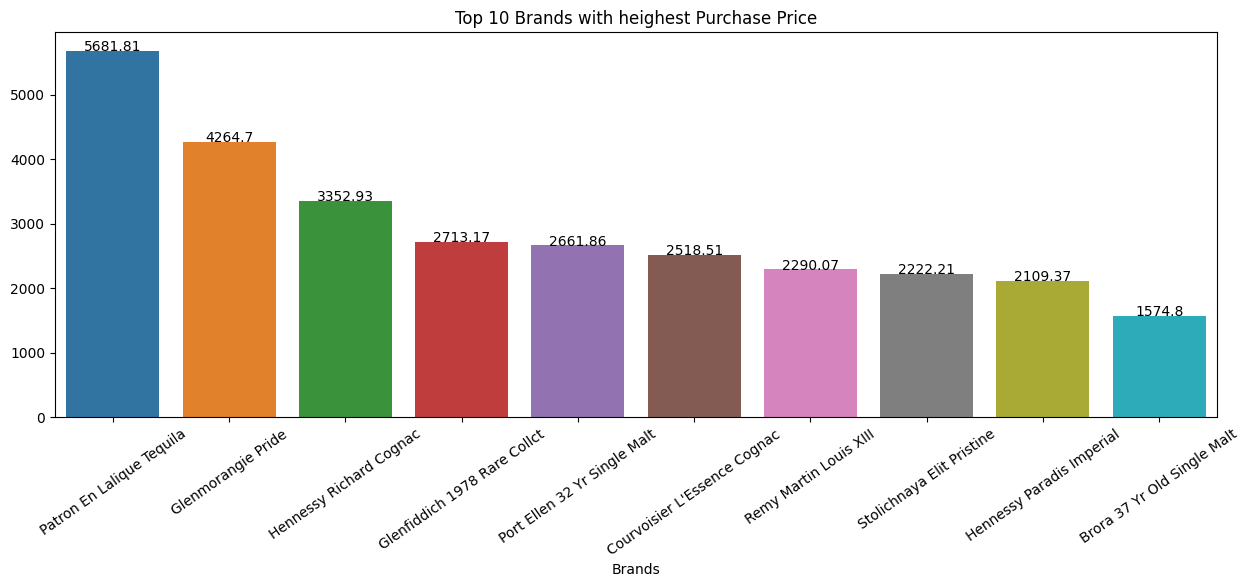

In [ ]:
plt.figure(figsize=(15,5))
vc = purchase_Final_df.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending=False)[:10]
g= sns.barplot(x=vc.index, y= vc.values , data =purchase_Final_df)

for i in range(10):
    value = vc[i]
    g.text(x=i , y= value , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 Brands with heighest Purchase Price')
plt.xlabel('Brands')
plt.xticks(rotation=35)
plt.show()

# "PEL Tequilla" has heighest Purchase Price followed by "G. Pride".

In [ ]:
sales.head(2)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY


In [ ]:
sales['Total Amount'] = sales['SalesDollars']+sales['ExciseTax']
sales.head(2)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName,Total Amount
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY,17.28
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY,34.55


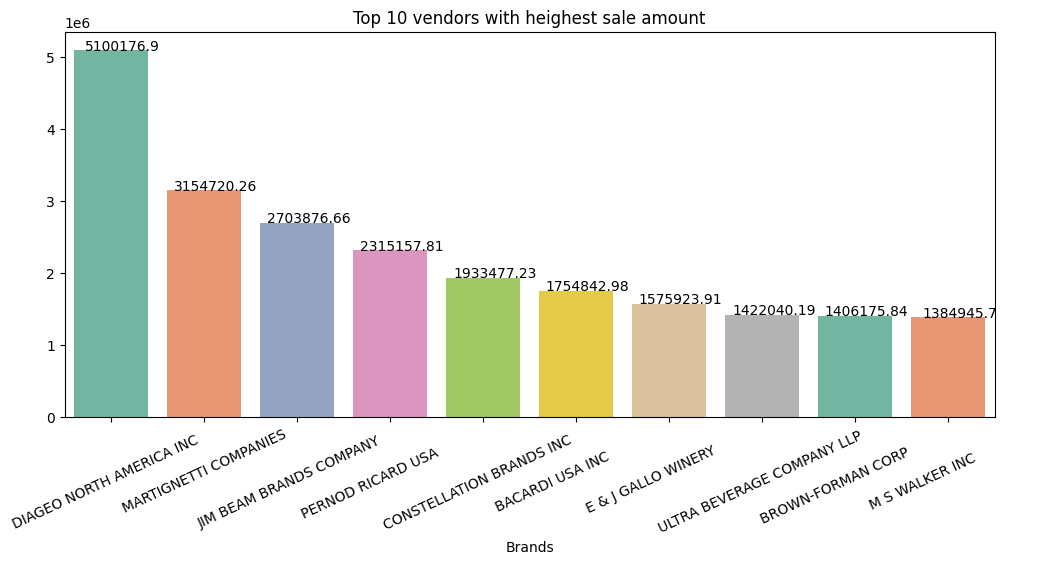

In [ ]:
plt.figure(figsize=(12,5))
vc= sales.groupby(['VendorName'])['Total Amount'].sum().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = sales, palette="Set2")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 vendors with heighest sale amount')
plt.xlabel('Brands')
plt.xticks(rotation = 25)
plt.show()


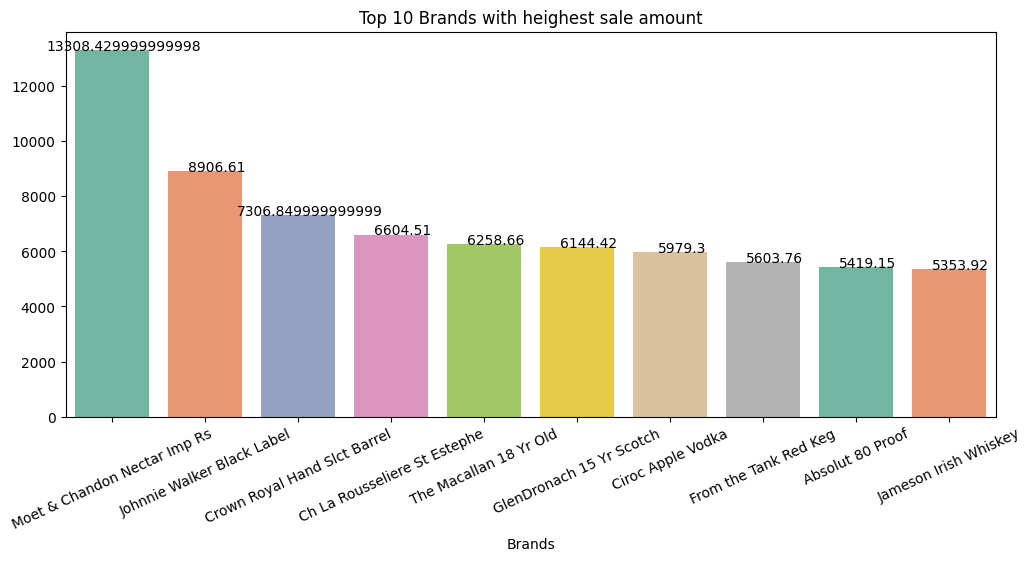

In [ ]:
plt.figure(figsize=(12,5))
vc= sales.groupby(['Description'])['Total Amount'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = sales, palette="Set2")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 Brands with heighest sale amount')
plt.xlabel('Brands')
plt.xticks(rotation = 25)
plt.show()


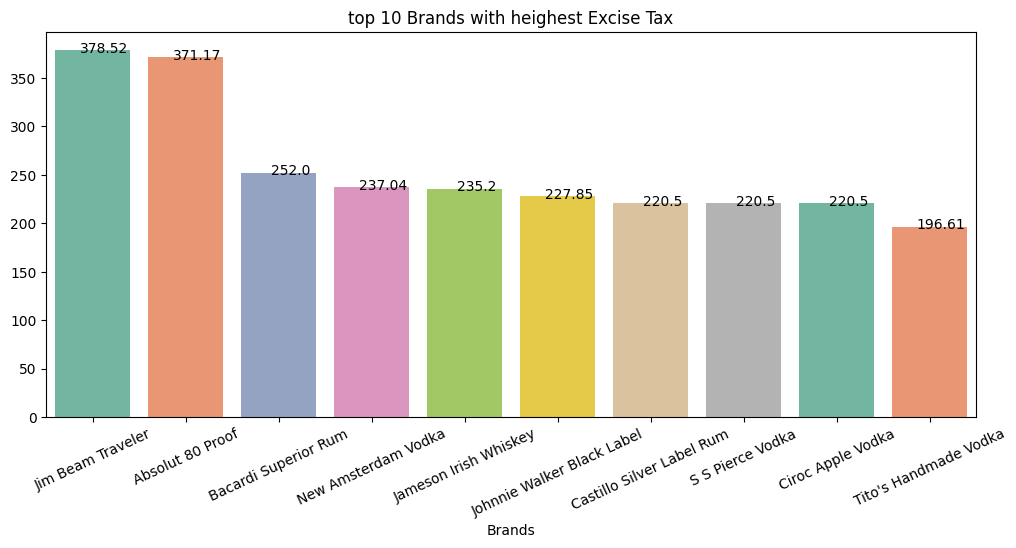

In [ ]:
plt.figure(figsize=(12,5))
vc= sales.groupby(['Description'])['ExciseTax'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = sales, palette="Set2")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('top 10 Brands with heighest Excise Tax')
plt.xlabel('Brands')
plt.xticks(rotation = 25)
plt.show()

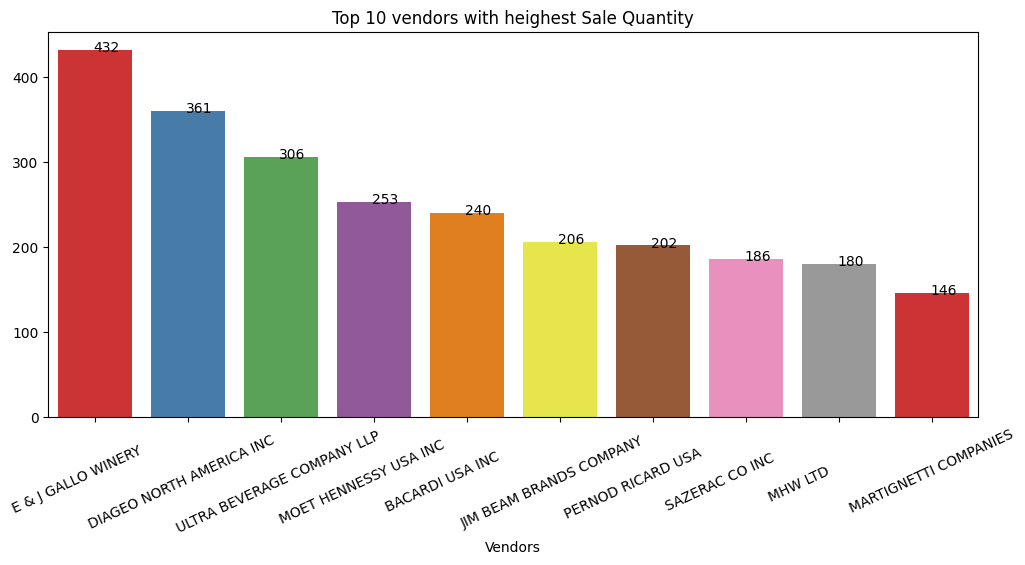

In [ ]:
plt.figure(figsize=(12,5))
vc= sales.groupby(['VendorName'])['SalesQuantity'].max().sort_values(ascending=False)[:10]
g = sns.barplot(x=vc.index , y= vc.values , data = sales, palette="Set1")

for i in range(10):
    value = vc[i]
    g.text(y=value-2 , x= i+0.125 , s = value , ha='center', color='black', fontsize=10)

plt.title('Top 10 vendors with heighest Sale Quantity')
plt.xlabel('Vendors')
plt.xticks(rotation = 25)
plt.show()